In [1]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)
data = data.dropna()

In [4]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [5]:
split_1 = int(len(data)*.6)
split_2 = int(len(data)*.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [6]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [7]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_out)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [8]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [9]:
import matplotlib.pyplot as plt

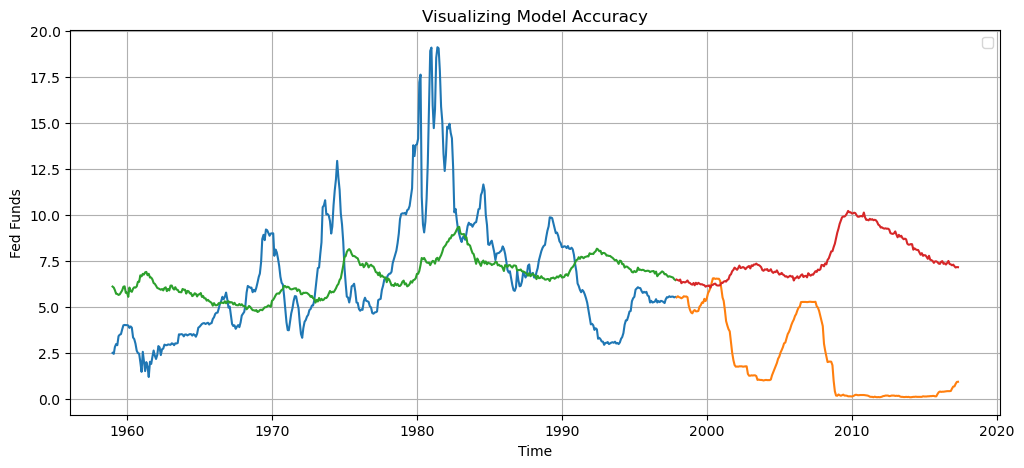

In [10]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [13]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783566732


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
max_degrees = 3

degrees are: 1


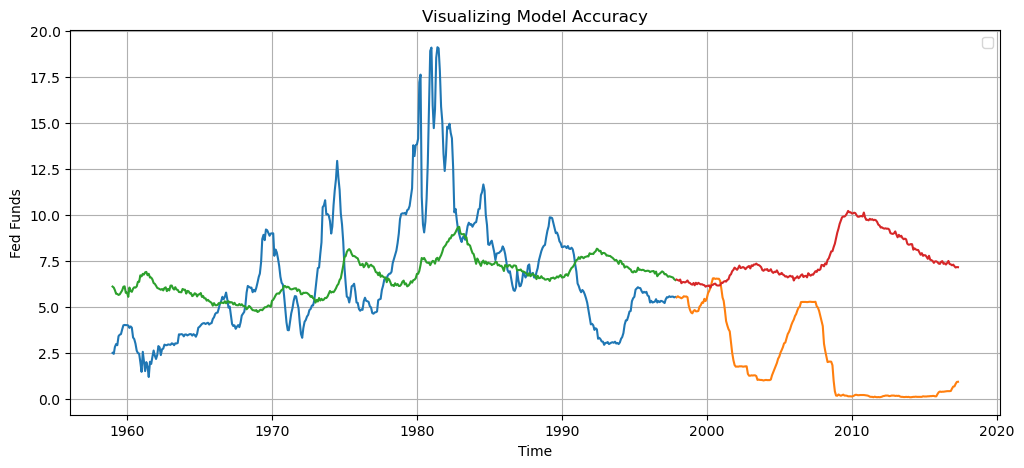

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835665916
degrees are: 2


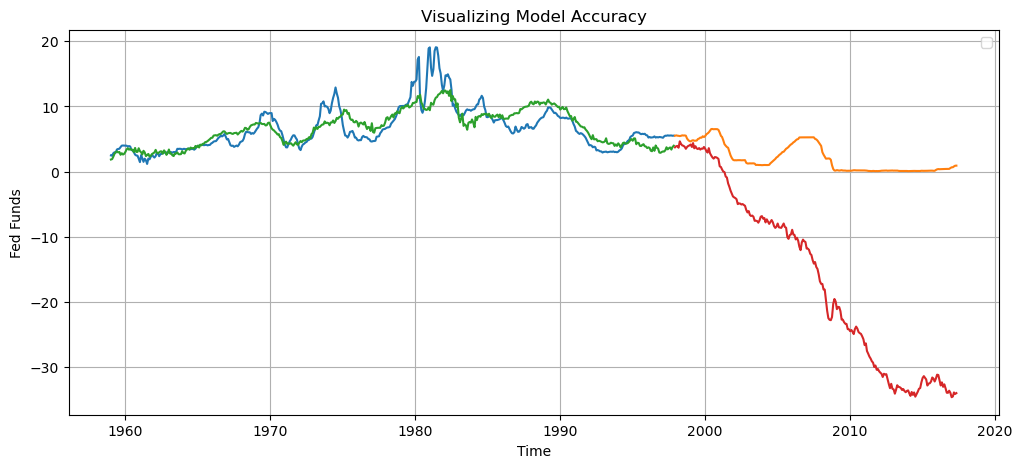

Insample MSE :  3.863477139276069
Outsample MSE :  481.44650991792037
degrees are: 3


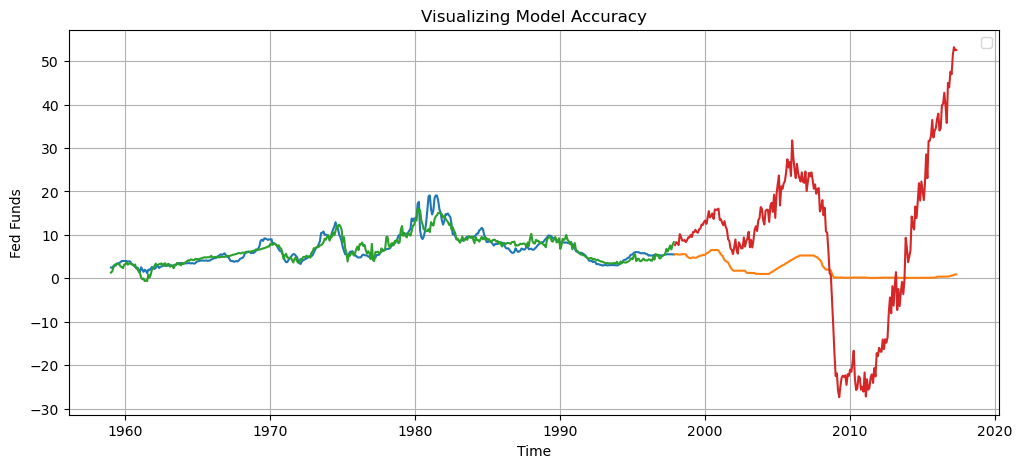

Insample MSE :  1.8723636267594668
Outsample MSE :  371.7677889463972


In [16]:
for degrees in range(1, max_degrees+1):
    print("degrees are:", degrees)

    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.fit_transform(X_out)
    

    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))


    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(X_in.index,model1.predict(X_in_poly))
    plt.plot(X_out.index,model1.predict(X_out_poly))


    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse_1 = mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1 = mean_squared_error(model1.predict(X_out_poly),y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1)
    

# 7.) State your observations :

According to the graph, insample MSE, and outsample MSE from the polynomial regression models with degrees 1, 2, and 3, we can observe that the model's complexity (degrees) significantly influences its performance. The linear model (degree 1) has higher imsample MSE and lower outsample MSE comparing to higher degrees models. So, the linear model (degree 1) may lead to higher bias and underfit complex data patterns; higher degrees models capture more data nuances but overfit. 